# [Huggingface란?](https://huggingface.co/)

- '허깅 페이스’는, 자연어 처리 스타트업이 개발한,
다양한 트랜스포머 모델(transformer.models)과 학습 스크립트(transformer.Trainer)를 제공하는 모듈입니다.
- 허깅 페이스를 사용한다면, 트랜스포머 모델 사용시 layer, model 등을 선언하거나 학습 스크립트를 구현해야하는 수고를 덜 수 있습니다.

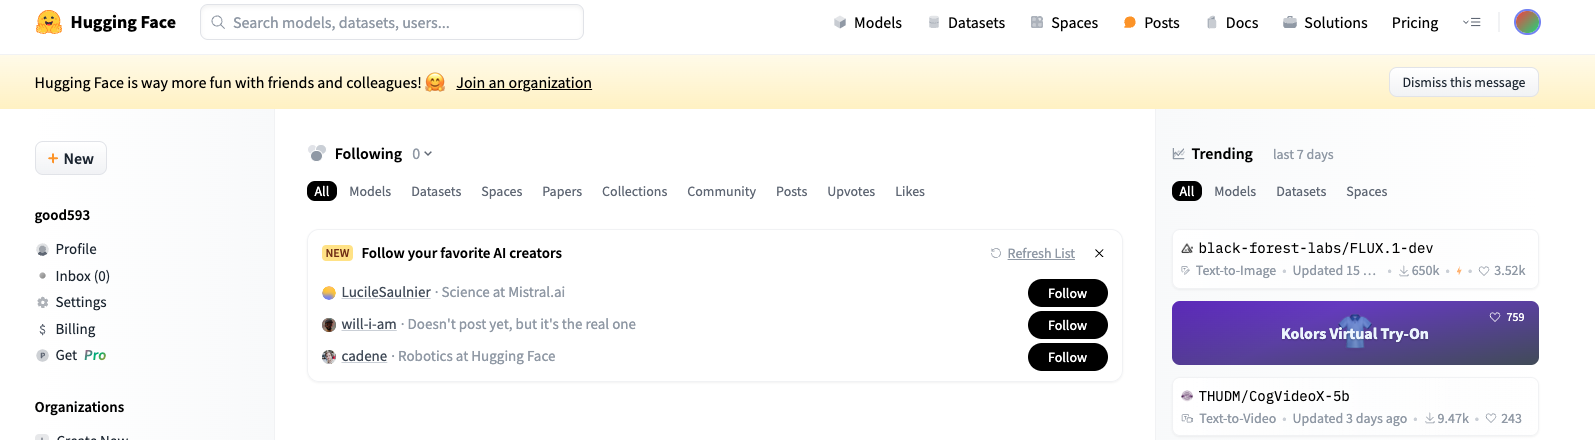

## [HuggingFace Hub](https://huggingface.co/docs/hub/index)
- Hugging Face Hub는 120k 이상의 모델, 20k의 데이터셋, 그리고 50k의 데모 앱(Spaces)을 포함하는 플랫폼입니다.
- 모든 것은 오픈 소스이며 공개적으로 이용할 수 있습니다.
- 이 플랫폼에서 사람들은 쉽게 협업하고 함께 ML을 구축할 수 있습니다.

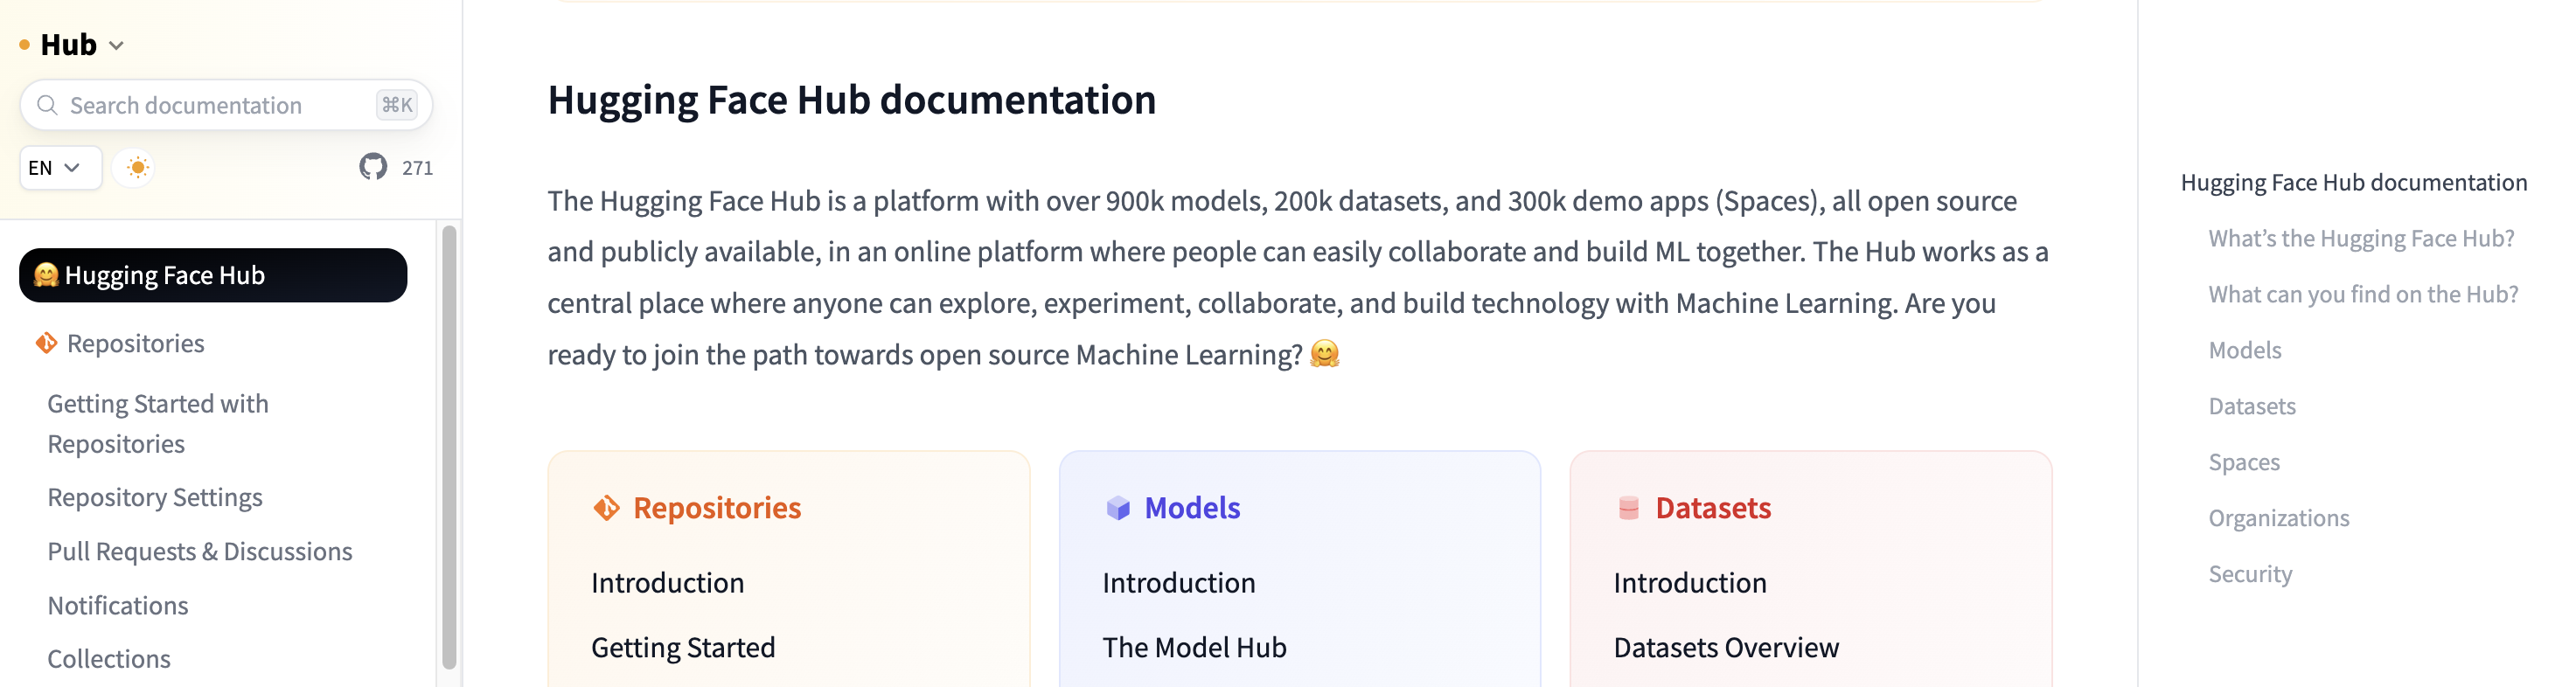

# Setup

### 필요한 라이브러리 설치

In [1]:
# 필요한 라이브러리 설치
!pip install langchain langchain_community huggingface_hub transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0

### [Huggingface 토큰 발급](https://huggingface.co/settings/tokens)

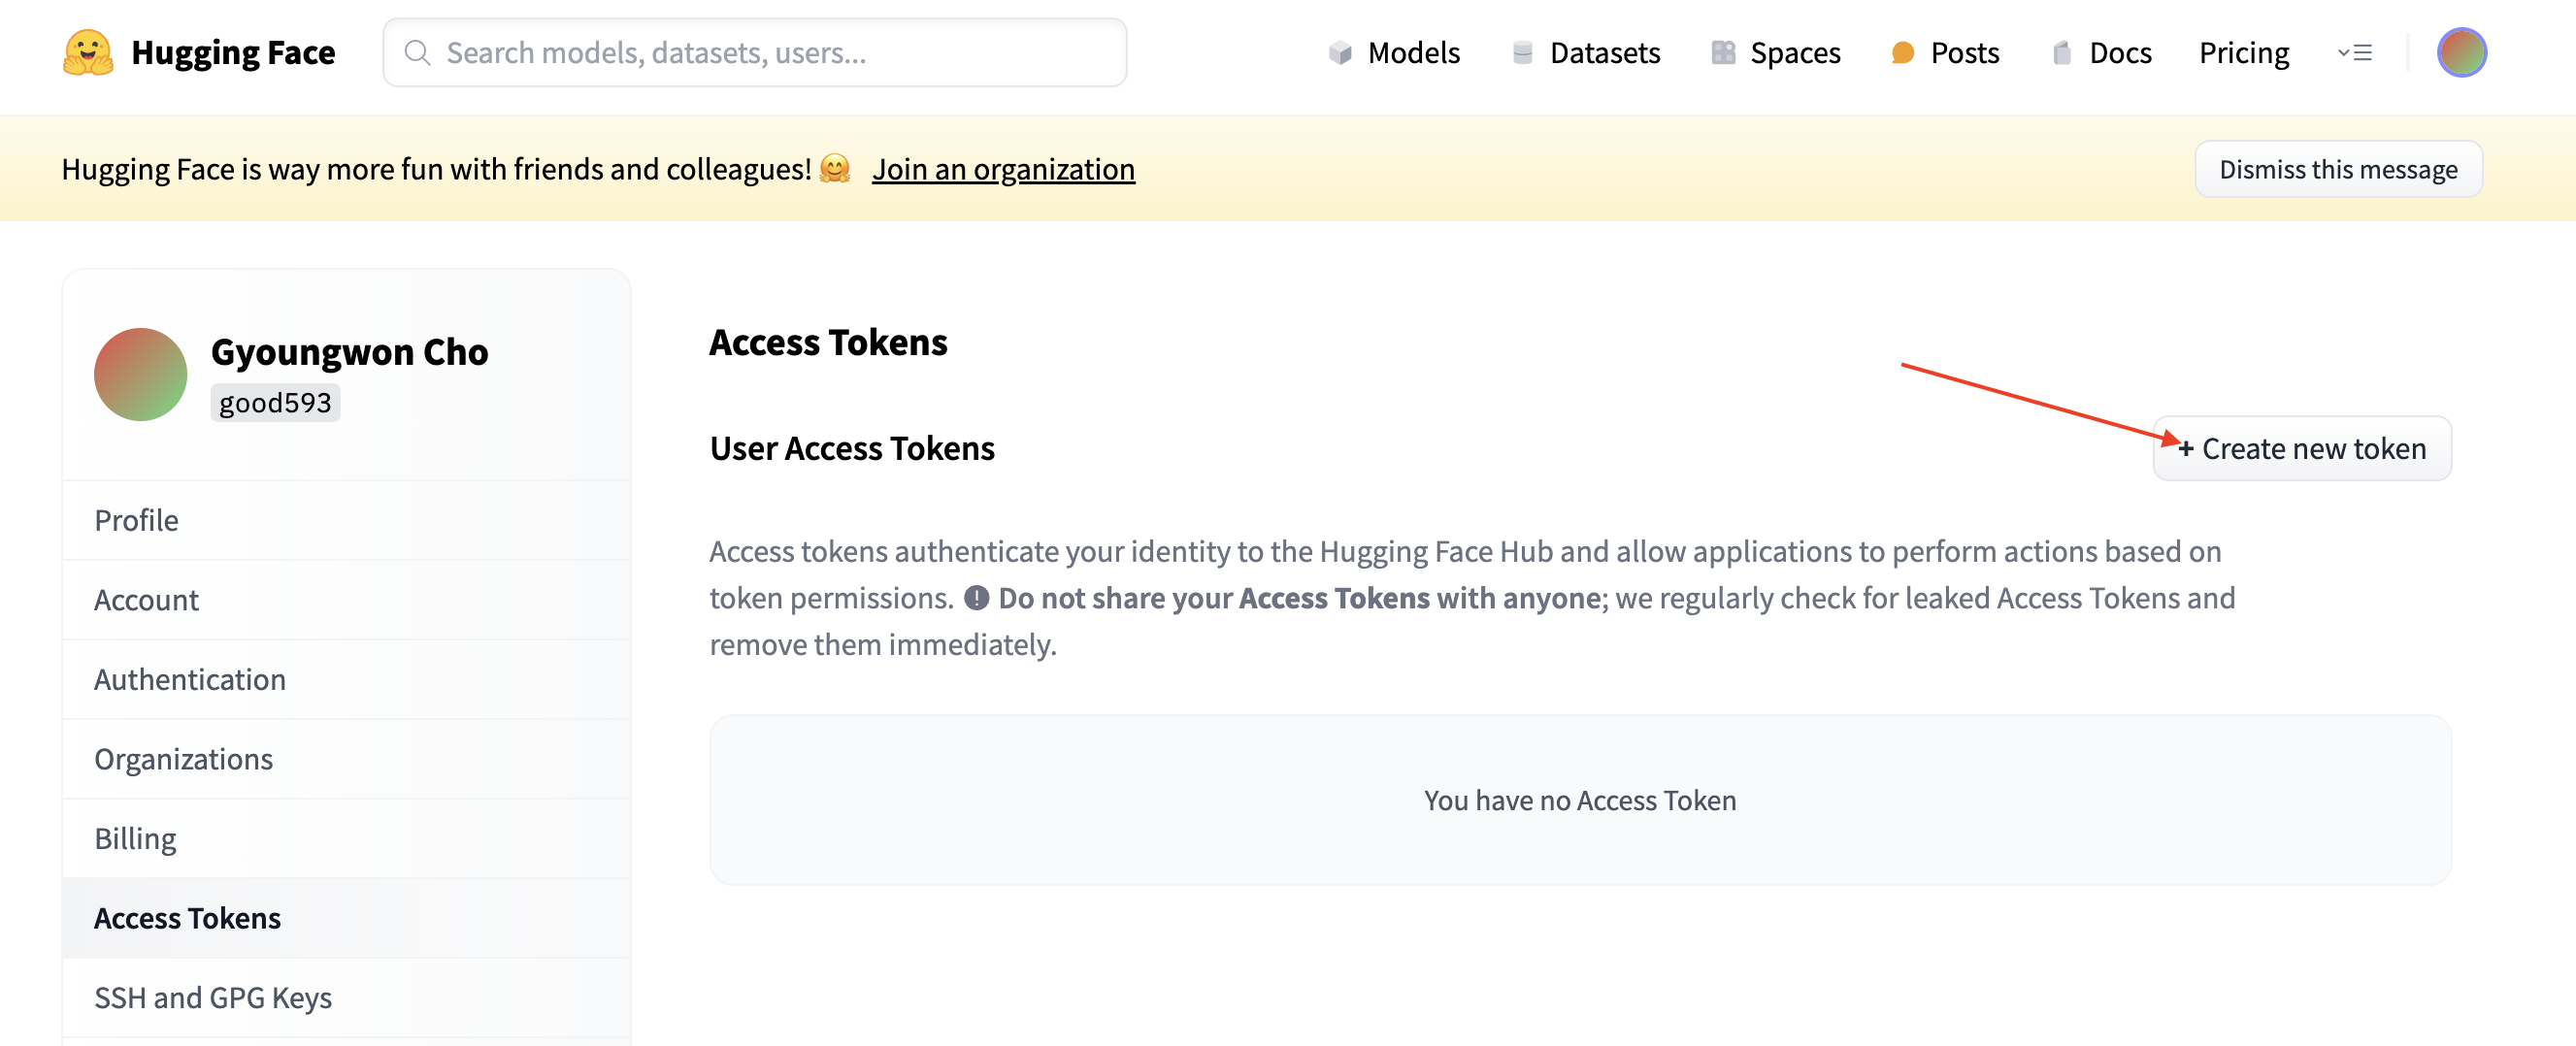

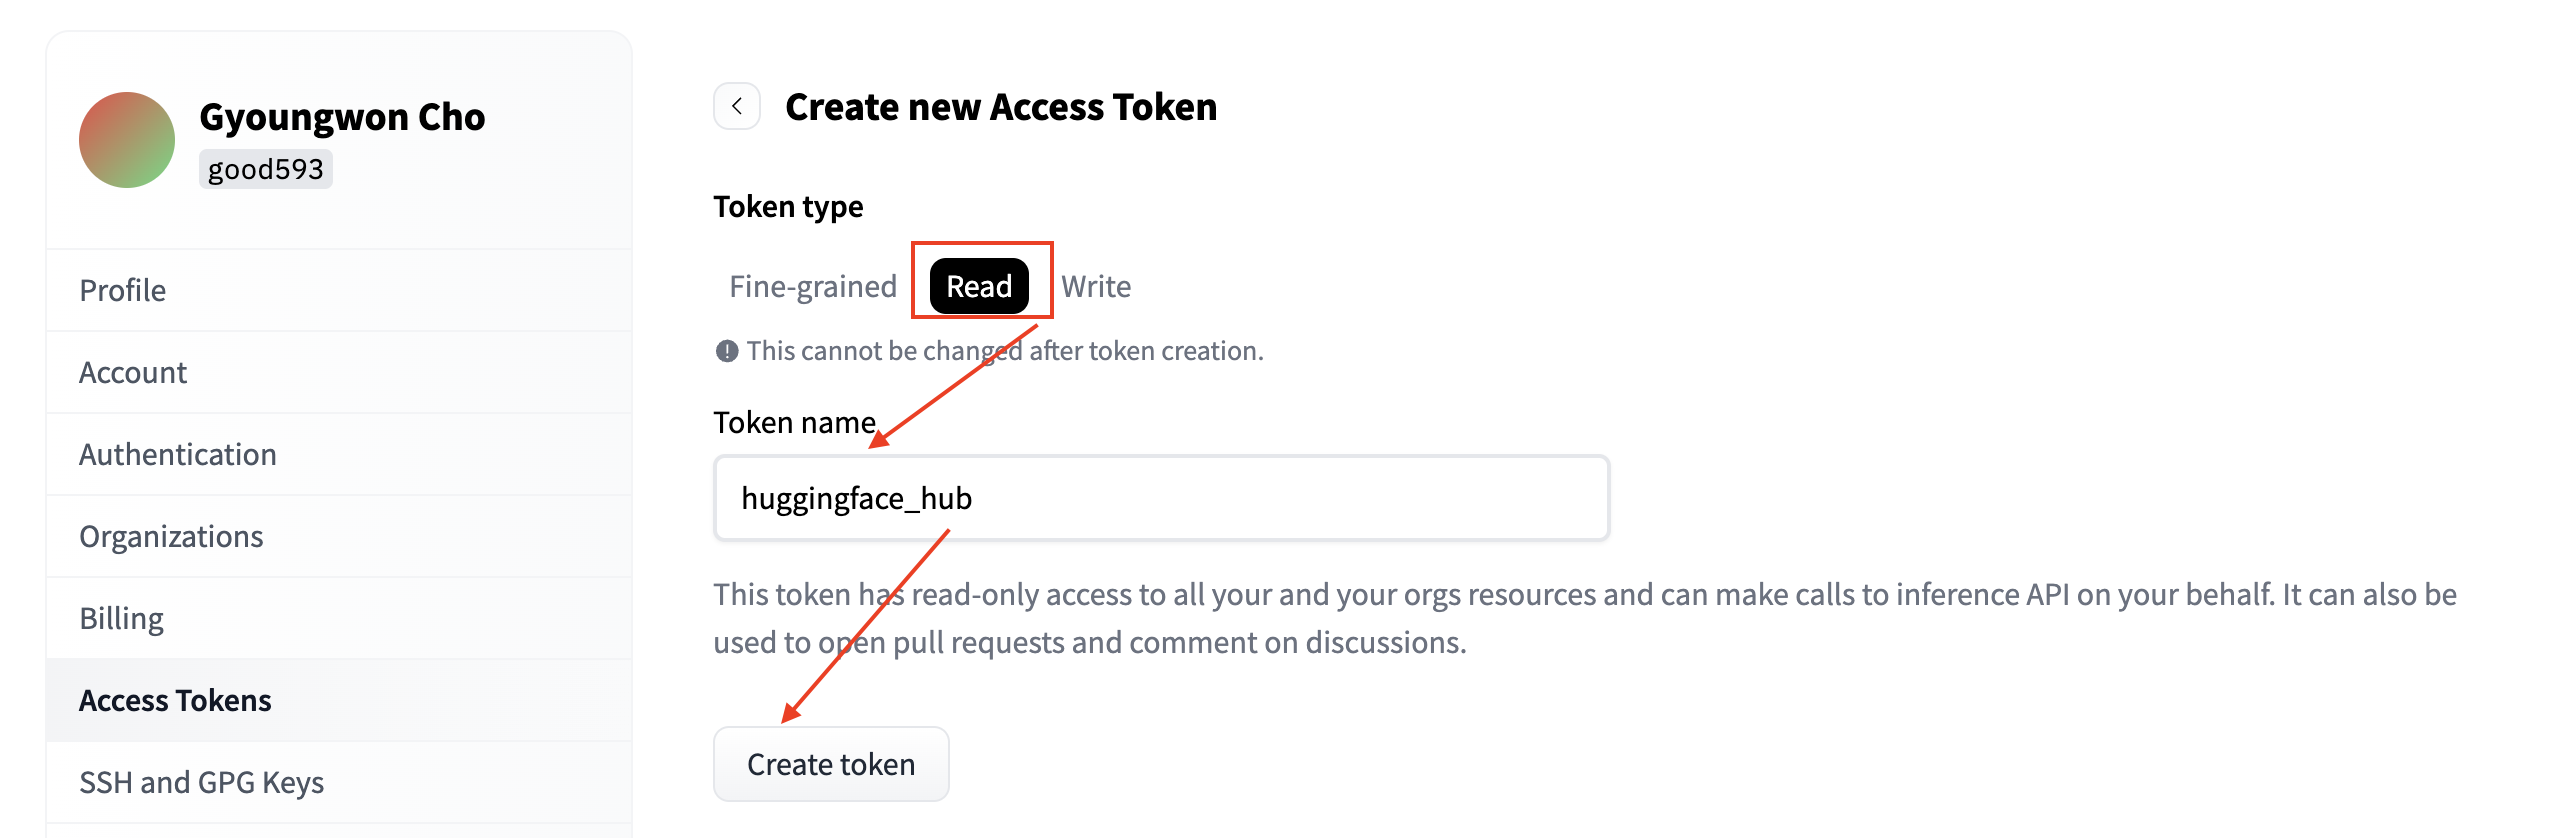

In [2]:
import os

# 허깅페이스 LLM Read Key
# 이전 단계에서 복사한 Key를 아래에 붙혀넣기 합니다.
os.environ['HUGGINGFACEHUB_API_TOKEN'] = ""


# [Huggingface Hub 예제](https://teddylee777.github.io/langchain/langchain-tutorial-02/#-huggingfacehub-%EC%97%90-%EB%B0%B0%ED%8F%AC%EB%90%9C-%EB%AA%A8%EB%8D%B8-%EC%B6%94%EB%A1%A0inference)

## Leaderboard

### [LLM Leaderboard](https://huggingface.co/spaces/open-llm-leaderboard/open_llm_leaderboard)

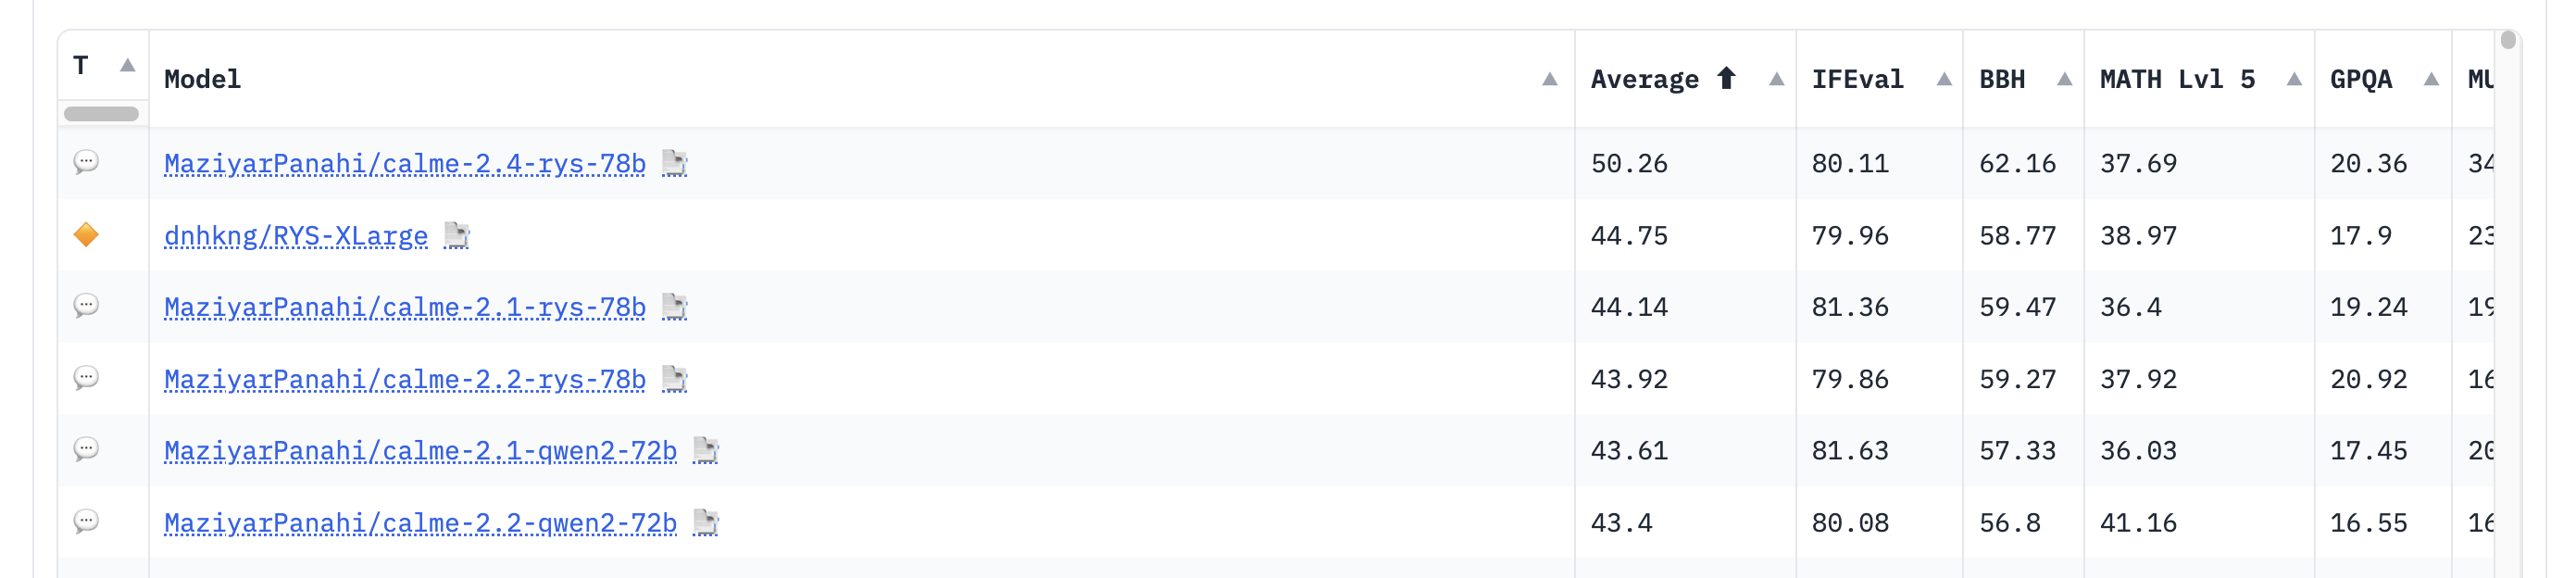

### [Korean LLM Leaderboard](https://huggingface.co/spaces/upstage/open-ko-llm-leaderboard)

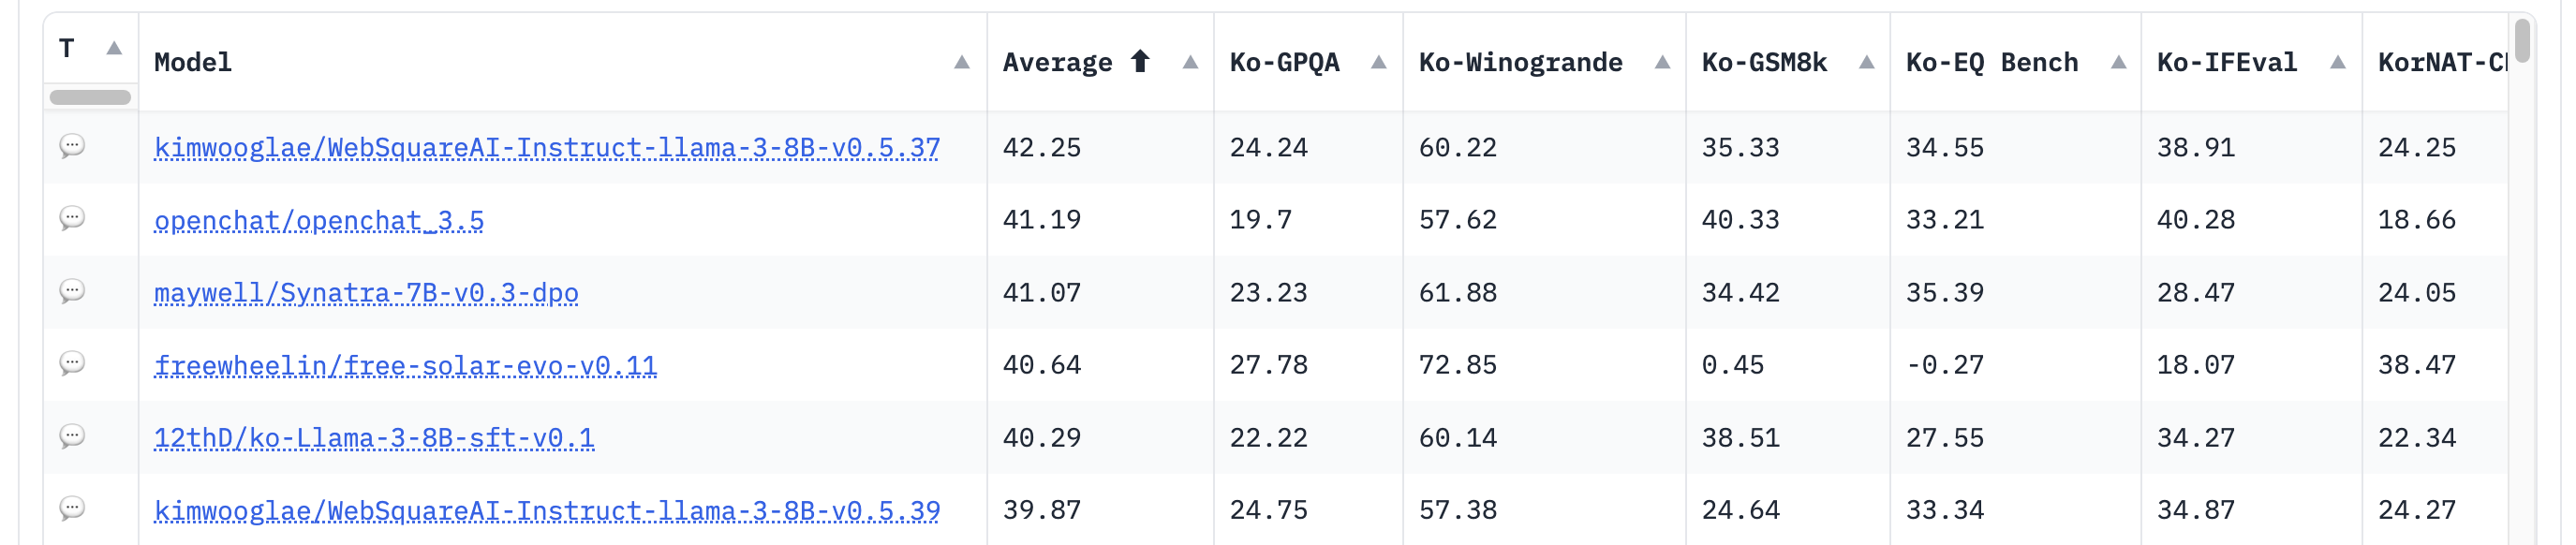

## [HggingFace Hub 서버를 이용한 추론](https://teddylee777.github.io/langchain/langchain-tutorial-02/#-huggingfacehub-%EC%97%90-%EB%B0%B0%ED%8F%AC%EB%90%9C-%EB%AA%A8%EB%8D%B8-%EC%B6%94%EB%A1%A0inference)
- 허깅페이스 서버에서 선택된 모델로 추론하고, 이에 대한 답변을 반환받는 방식입니다.

In [5]:
from langchain import LLMChain
from langchain.prompts import PromptTemplate
from langchain.llms import HuggingFaceHub

### PromptTemplate

In [24]:
# 템플릿
template = """
Question: {question}

Answer: """

In [25]:
# 프롬프트 템플릿 생성
# -> LLM에게 우리가 궁금한 질문(question) 물어보고, 그리고 답변을 받는 포맷
prompt = PromptTemplate(template=template, input_variables=["question"])

prompt

PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='\nQuestion: {question}\n\nAnswer: ')

### LLM (사전학습 모델)

In [43]:
# HuggingFace Repository ID
repo_id = 'mistralai/Mistral-7B-v0.1'

# HuggingFaceHub 객체 생성
llm = HuggingFaceHub(
    repo_id=repo_id,
    model_kwargs={"temperature": 0.2, # 자유도
                  "max_length": 128} # 최대 답변 길이
)

### Chain 생성 (Promt + LLM)
- LLM 모델이 응답을 하는 원리
  - input -> Question: {question} Answer:
  - model(1.예측) -> Question: {question} Answer: + token
  - input -> Question: {question} Answer: + token
  - model(2.예측) -> Question: {question} Answer: + token + token
  - ...

In [45]:
# LLM Chain 객체 생성
llm_chain = LLMChain(prompt=prompt, llm=llm)

llm_chain

LLMChain(verbose=False, prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='\nQuestion: {question}\n\nAnswer: '), llm=HuggingFaceHub(client=<InferenceClient(model='mistralai/Mistral-7B-v0.1', timeout=None)>, repo_id='mistralai/Mistral-7B-v0.1', task='text-generation', model_kwargs={'temperature': 0.2, 'max_length': 128}), output_parser=StrOutputParser(), llm_kwargs={})

### 질의 응답
- Huggingface 서버를 통해서 예측

In [46]:
# 질의내용
my_question = "Who is Son Heung Min?"

# 실행
print(llm_chain.run(question=my_question))


Question: Who is Son Heung Min?

Answer: 1. Son Heung Min is a South Korean professional footballer who plays as a winger for Premier League club Tottenham Hotspur and the South Korea national team.

2. He has been named the South Korean Footballer of the Year three times and has been included in the K League Best XI three times.

3. He is the first Asian player to score 100 goals in Europe’s top five leagues.

4. He is the


In [28]:
# 질의내용 -> 한국어 불가능;;;;
my_question = "Please explain about King Sejong in Korean."

# 실행
print(llm_chain.run(question=my_question))


Question: Please explain about King Sejong in Korean.

Answer: 세종대왕 (Sejong Daewang)

King Sejong was the fourth king of the Joseon Dynasty. He was born in 1397 and died in 1450. He was the son of King Taejong and Queen Soheon. He was the third son of King Taejong.

King Sejong was a great king. He was the one who created the Korean alphabet,


## 모델 다운로드 후 로컬(local)에서 추론

In [3]:
import os

# 허깅페이스 모델/토크나이저를 다운로드 받을 경로
# (예시)
os.environ['HF_HOME'] = './hugging_face'

### LLM

In [4]:
from langchain import LLMChain
from langchain.prompts import PromptTemplate
from langchain.llms import HuggingFacePipeline

# HuggingFace Model ID
model_id = 'beomi/llama-2-ko-7b'

# HuggingFacePipeline 객체 생성
llm = HuggingFacePipeline.from_model_id(
    model_id=model_id,
    device=0,               # -1: CPU(default), 0번 부터는 CUDA 디바이스 번호 지정시 GPU 사용하여 추론
    task="text-generation", # 텍스트 생성
    model_kwargs={"temperature": 0.1,
                  "max_length": 64},
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/842 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.55M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00015.safetensors:   0%|          | 0.00/919M [00:00<?, ?B/s]

model-00002-of-00015.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00003-of-00015.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

model-00004-of-00015.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

model-00005-of-00015.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00006-of-00015.safetensors:   0%|          | 0.00/944M [00:00<?, ?B/s]

model-00007-of-00015.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00008-of-00015.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

model-00009-of-00015.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

model-00010-of-00015.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00011-of-00015.safetensors:   0%|          | 0.00/944M [00:00<?, ?B/s]

model-00012-of-00015.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00013-of-00015.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

model-00014-of-00015.safetensors:   0%|          | 0.00/742M [00:00<?, ?B/s]

model-00015-of-00015.safetensors:   0%|          | 0.00/380M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/15 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

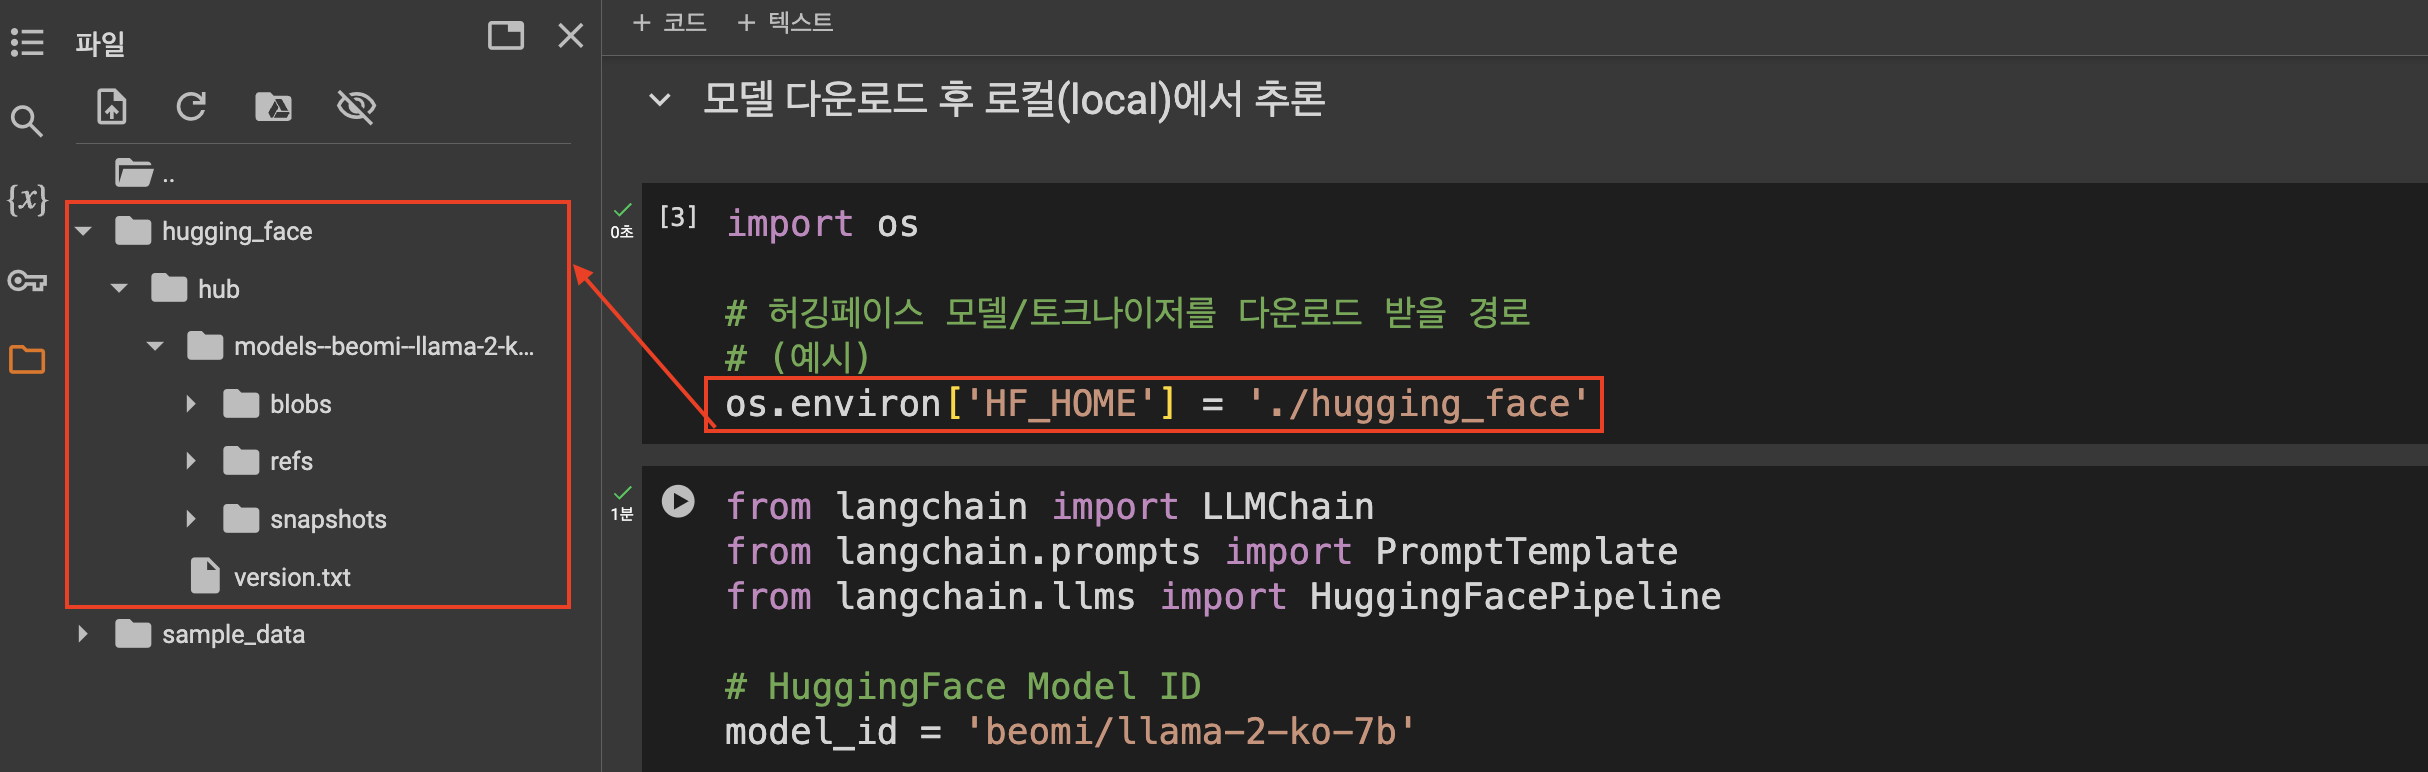

### PromptTemplate

In [6]:
# 템플릿
template = """
질문: {question}

답변: """

# 프롬프트 템플릿 생성
prompt = PromptTemplate.from_template(template)

### LLMChain

In [7]:
# LLM Chain 객체 생성
llm_chain = LLMChain(prompt=prompt, llm=llm)

<ipython-input-7-c1273d95264b>:2: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  llm_chain = LLMChain(prompt=prompt, llm=llm)


In [8]:
# 실행
question = "대한민국의 수도는 어디야?"
print(llm_chain.run(question=question))

<ipython-input-8-e067b2d52a04>:3: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  print(llm_chain.run(question=question))
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/


질문: 대한민국의 수도는 어디야?

답변: ​서울입니다.​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​


In [9]:
question = "대한민국의 2번째로 큰 도시 이름은?"
print(llm_chain.run(question=question))

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(



질문: 대한민국의 2번째로 큰 도시 이름은?

답변: ​부산​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​
